In [1]:
from seir_models import *
from seir_utils import *
import numpy as np
np.random.seed(42)

In [2]:
# === LOAD DATA ===
filepath = "epi_data_comparison/simulation_outputs/normal/output_luxembourg.csv"
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)


In [3]:
times = np.arange(len(observed))

Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Current   Time    
0     7     -5.27e+09 -5.27e+09   0:00.0
1     14    -3.27e+09 -3.27e+09   0:00.0
2     21    -5.34e+08 -5.34e+08   0:00.0
3     28    -5.34e+08 -3.3e+09    0:00.0
20    147   -2.8e+08  -5.08e+08   0:00.1
40    287   -2.73e+08 -2.73e+08   0:00.2
60    427   -2.72e+08 -2.72e+08   0:00.3
80    567   -2.72e+08 -2.72e+08   0:00.3
100   707   -2.72e+08 -2.72e+08   0:00.4
120   847   -2.72e+08 -2.72e+08   0:00.5
140   987   -2.72e+08 -2.72e+08   0:00.6
160   1127  -2.72e+08 -2.72e+08   0:00.6
180   1267  -2.72e+08 -2.72e+08   0:00.7
200   1407  -2.72e+08 -2.72e+08   0:00.8
220   1547  -2.72e+08 -2.72e+08   0:00.9
240   1687  -2.72e+08 -2.72e+08   0:01.0
260   1827  -2.72e+08 -2.72e+08   0:01.1
280   1967  -2.72e+08 -2.72e+08   0:01.2
300   2107  -2.72e+08 -2.72e+08   0:01.3
320   2247  -2.72e+08 -2.72e+08   0:01.3
340   2387  -2.72e+08 

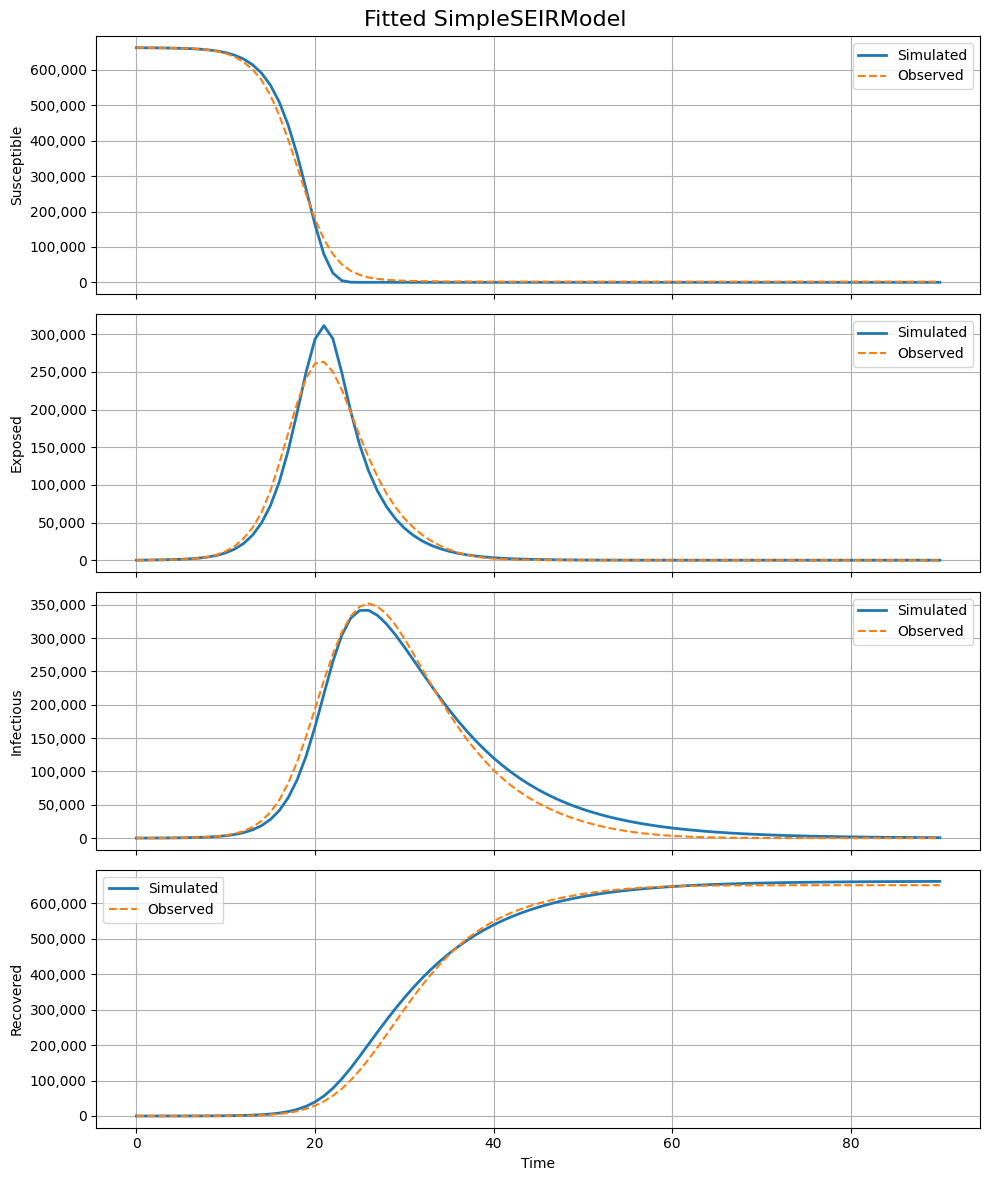

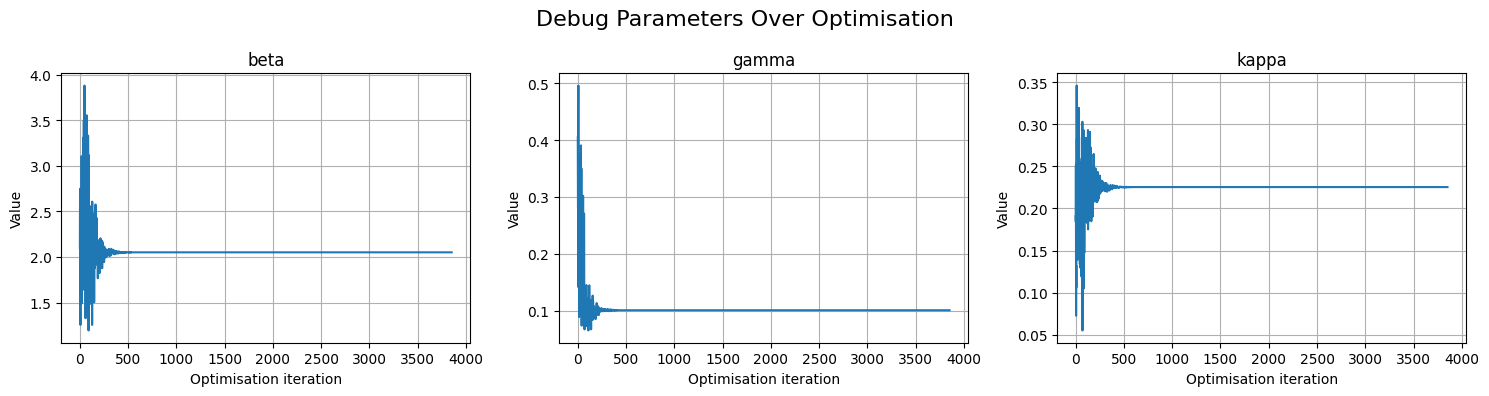

{'optimized_parameters': array([2.05118889, 0.22546231, 0.10045292]), 'log_posterior': -272318684.30034304, 'R_estimate': 4.2034464564896785, 'beta': 2.0511888944590275, 'kappa': 0.2254623050856784, 'gamma': 0.10045291948184083}


In [4]:

# Simple model
model = SimpleSEIRModel(initial_conditions)
result = model.fit_with_pints(times, observed, x0=[1.8, 1/5, 1/3])
print(result)


[599000, 0, 100, 0]
Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 9
Iter. Eval. Best      Current   Time    
0     9     -inf      -inf        0:00.0
1     18    -1.88e+11 -1.88e+11   0:00.0
2     27    -1.88e+11 -inf        0:00.0
3     36    -9.34e+10 -9.34e+10   0:00.0
20    189   -3.8e+10  -8.35e+10   0:00.0
40    369   -3.5e+10  -5.85e+10   0:00.1
60    549   -3.2e+10  -3.2e+10    0:00.1
80    729   -2.38e+10 -2.38e+10   0:00.2
100   909   -1.41e+10 -1.67e+10   0:00.2
120   1089  -1.24e+10 -1.4e+10    0:00.3
140   1269  -1.07e+10 -1.16e+10   0:00.3
160   1449  -9.57e+09 -1.05e+10   0:00.4
180   1629  -9.3e+09  -9.54e+09   0:00.4
200   1809  -8.77e+09 -8.77e+09   0:00.5
220   1989  -8.65e+09 -8.76e+09   0:00.5
240   2169  -8.46e+09 -8.5e+09    0:00.6
260   2349  -8.41e+09 -8.42e+09   0:00.6
280   2529  -8.3e+09  -8.33e+09   0:00.6
300   2709  -8.26e+09 -8.3e+09    0:00.7
320   2889  -8.26e+09 -8.28e+09   0:00.7
34

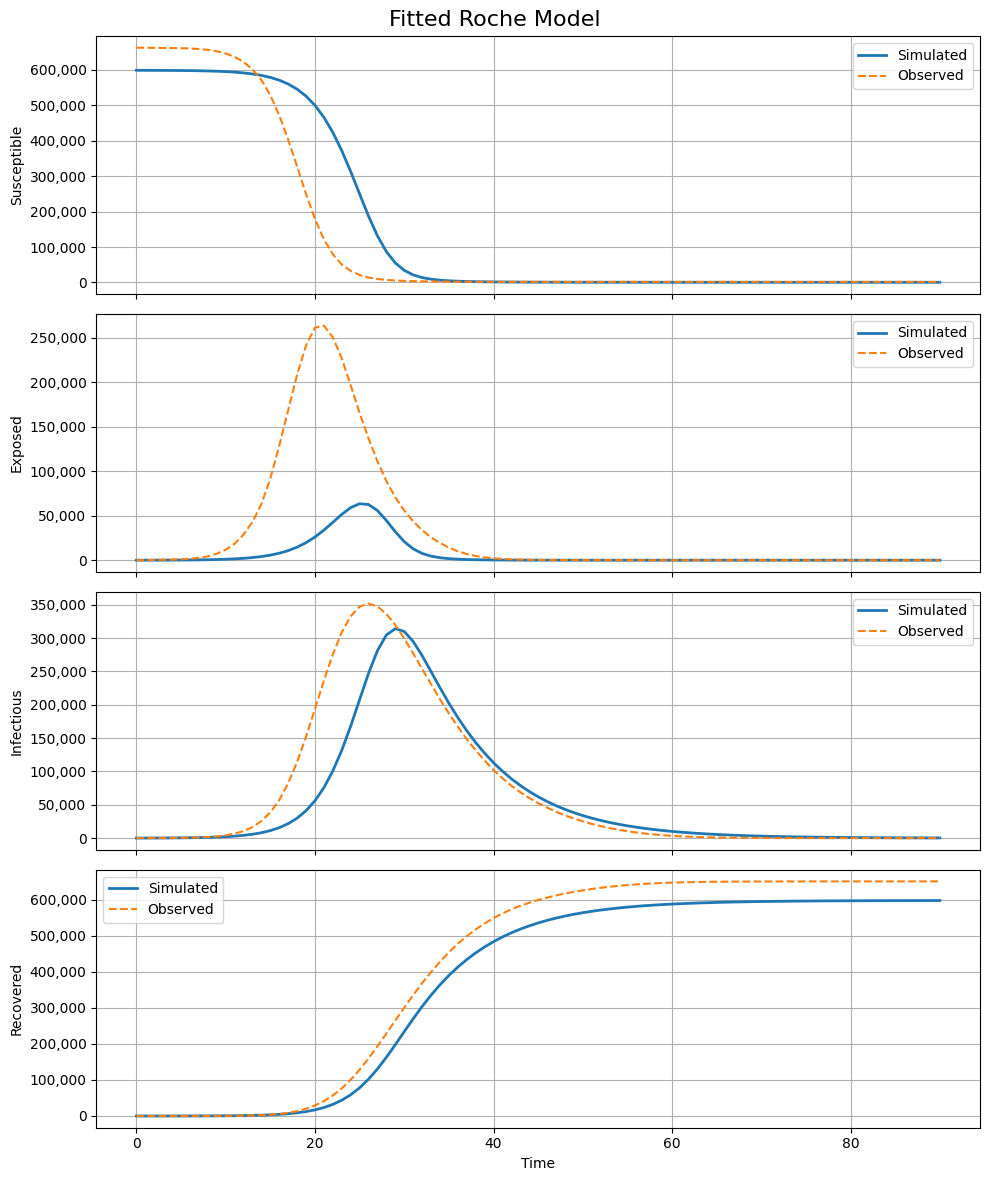

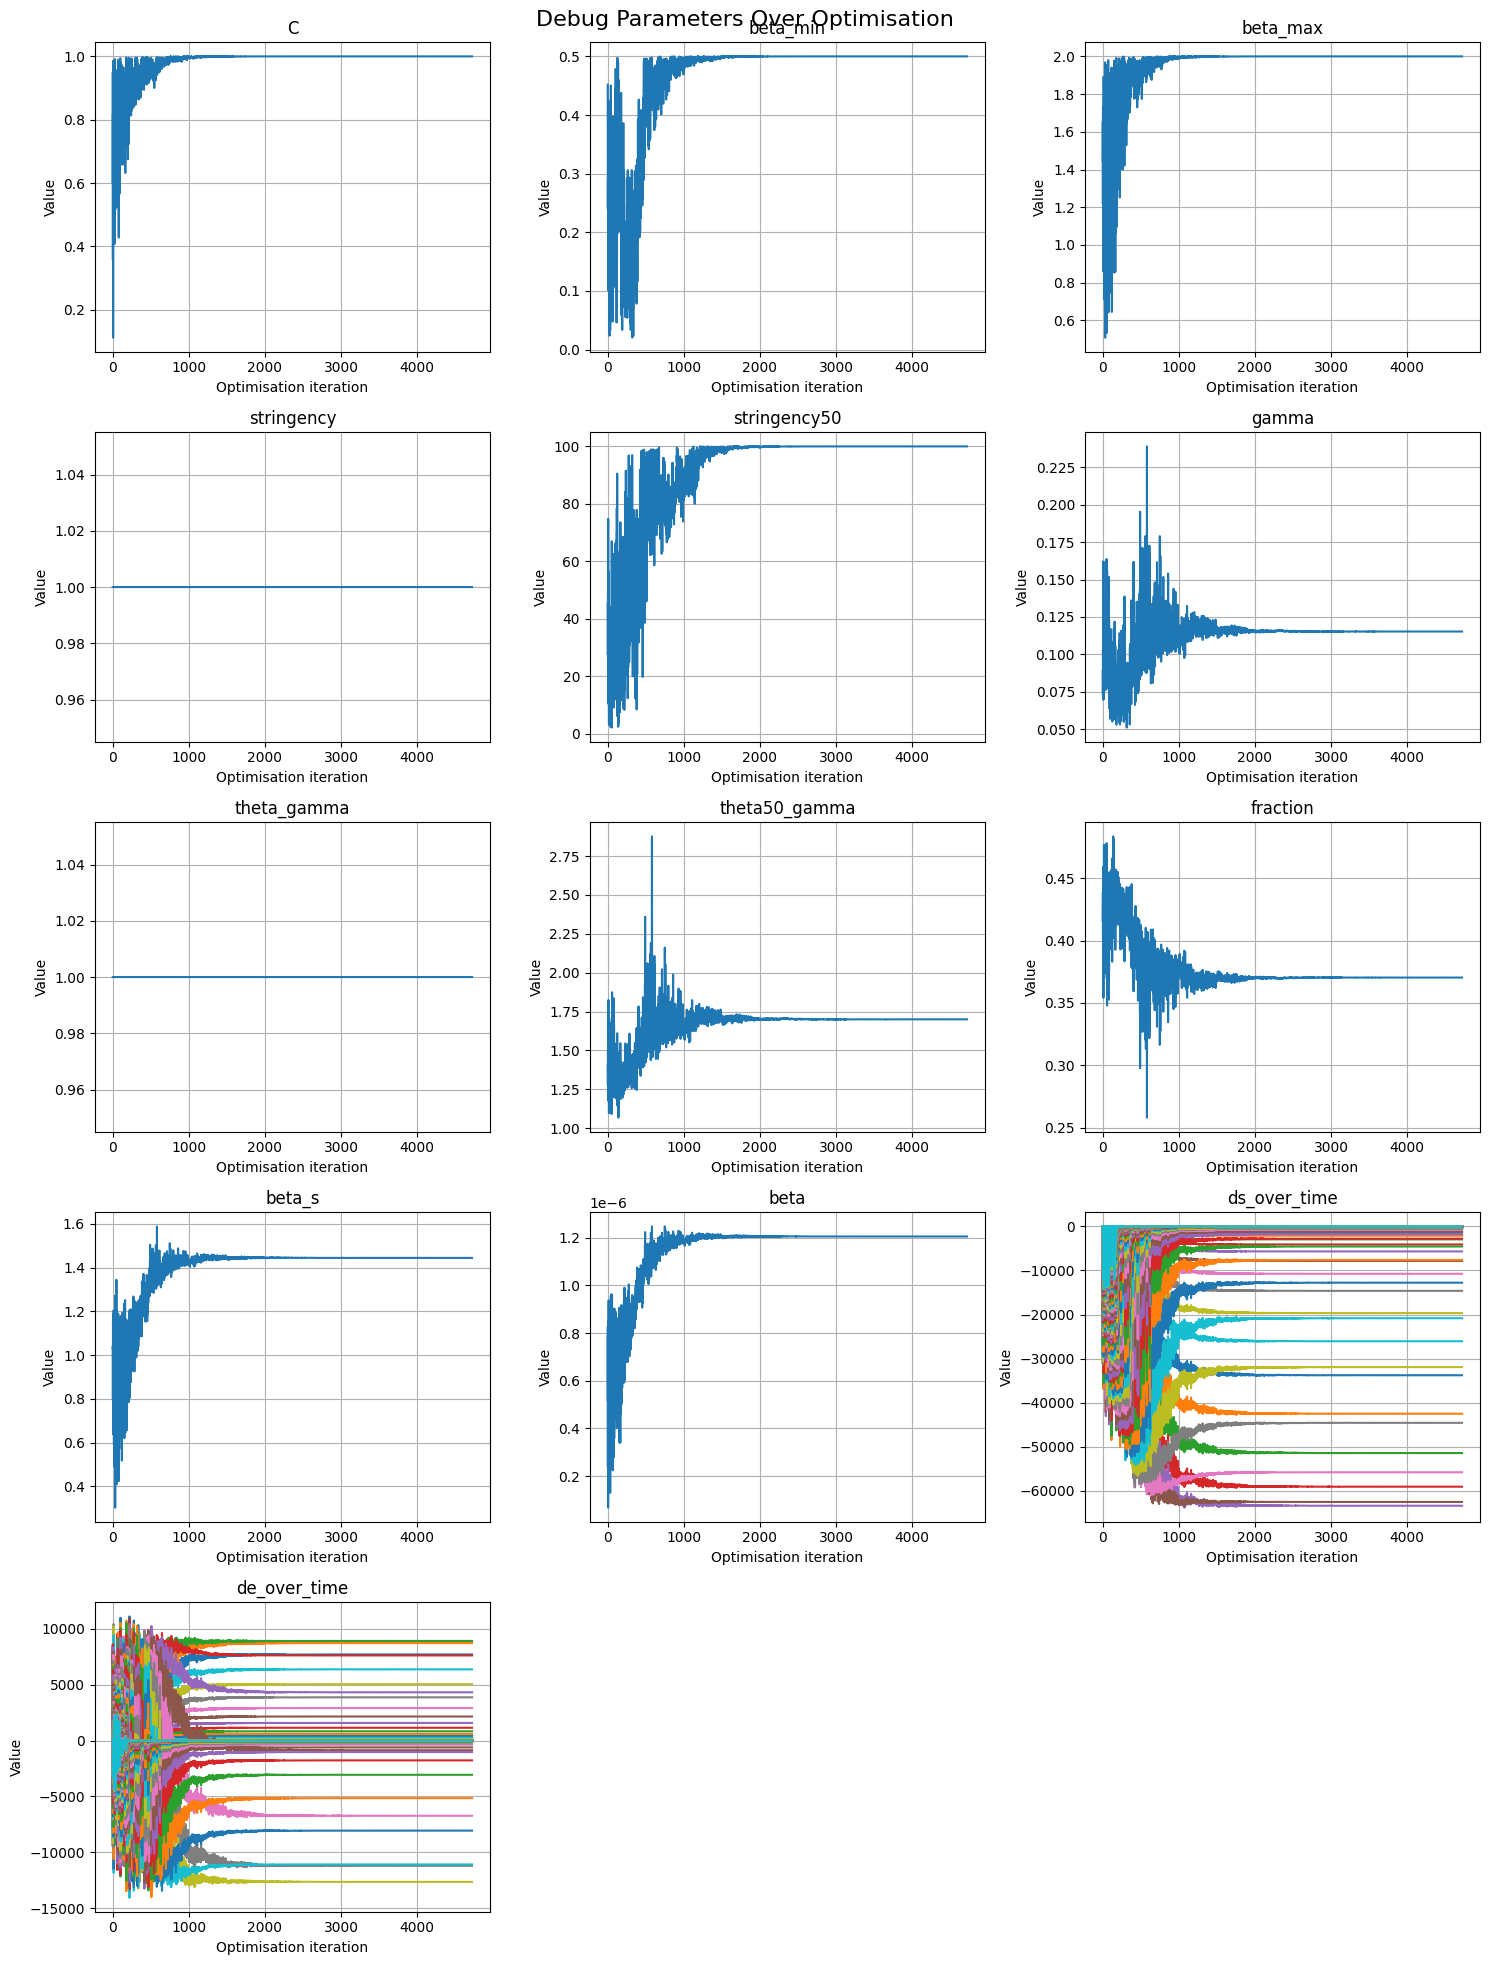

{'optimized_parameters': array([ 1.        ,  0.5       ,  2.        , 99.99999938,  1.        ,
        3.43928717,  5.23894811]), 'log_posterior': -8200381134.979944, 'R_estimate': 1.7136164313776243, 'beta': 1.2055204944573183e-06, 'kappa': 0.9999999997352245, 'gamma': 0.11523080071608793}


In [11]:
# Roche model
model = RocheModel(initial_conditions)
print(initial_conditions)
times = np.arange(91)
result = model.fit_with_pints(times, observed, x0 = [0.5, 0.5, 3.0, 50, 5, 5, 5])
print(result)

In [6]:
# Minimal test without loading data
initial_conditions = [599000, 0, 100, 0]

times = np.linspace(0, 100, 250)
parameters = [
    35,      # C: scaling factor (unitless)
    0.135,    # beta_min: minimum daily infection rate
    1.08,     # beta_max: maximum infection rate (symptomatic, no mitigation)
    50,     # stringency index (%)
    60,     # max stringency (%)
    2.59,     # k: time to become infectious after exposure (days)
    10,     # k_s: time from infectiousness to symptom onset (days)
    10,      # k_ri: time to recover for asymptomatic/mild cases (days)
]


model = RocheModel(initial_conditions)
states = model.simulate(parameters, times)

model.plot(times, states, title="Roche Model Synthetic Test")

ValueError: too many values to unpack (expected 7)

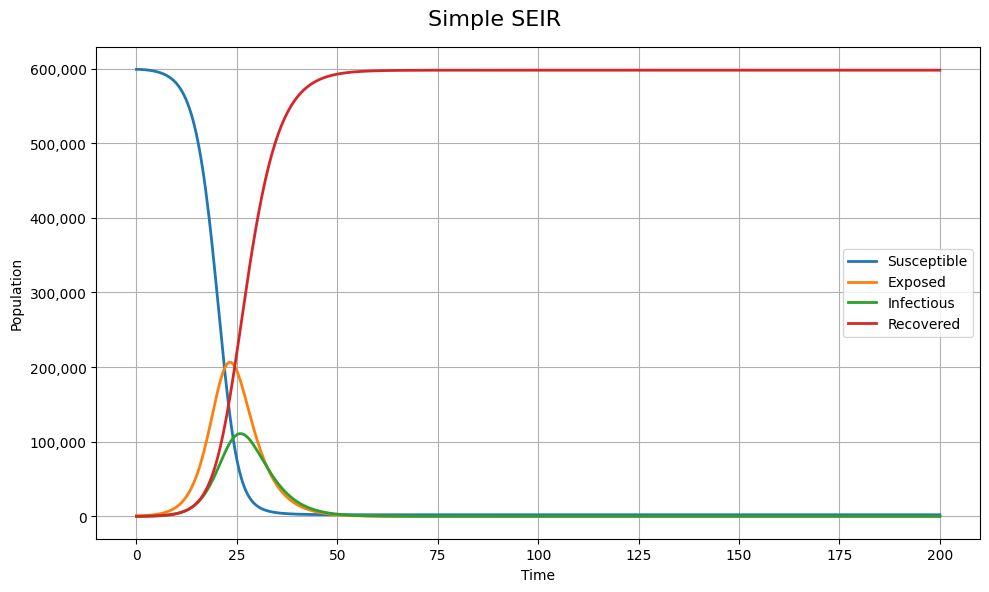

In [ ]:
model = SimpleSEIRModel(initial_conditions=[599000, 1000, 0, 0])
params = [1.8, 1/5, 1/3]
times = np.linspace(0, 200, 500)
sim = model.simulate(params, times)
model.plot(times, sim, title="Simple SEIR")